In [1]:
from __future__ import print_function

from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, rdmolops

In [2]:
smiles = {
    "aminocyclohexane": "C1CCCCC1N",
    "aniline": "c1ccccc1N",
    "benzene": "c1ccccc1",
    "diaminocyclohexane": "C1CC(N)CCC1N",
    "aminocyclohexane2": "C1CC(N)CCC1",
}

mols = {k: Chem.MolFromSmiles(v) for k, v in smiles.items()}

In [3]:
%matplotlib inline

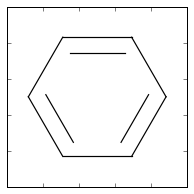

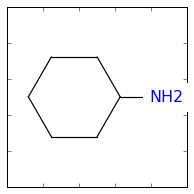

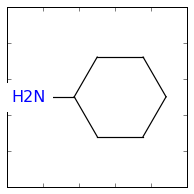

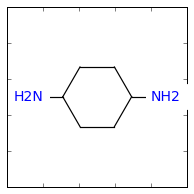

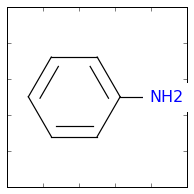

In [4]:
for name, mol in mols.items():
    fig = Draw.MolToMPL(mol, size=(100, 100))

In [5]:
import pandas as pd


print("The molecule in row is substructure of the molecule in column - True or False?")
substructure = pd.DataFrame({k: [v.HasSubstructMatch(other) for other in mols.values()] 
                             for k, v in mols.items()}, index=mols.keys())
substructure

The molecule in row is substructure of the molecule in column - True or False?


,aminocyclohexane,aminocyclohexane2,aniline,benzene,diaminocyclohexane
benzene,False,False,True,True,False
aminocyclohexane,True,True,False,False,True
aminocyclohexane2,True,True,False,False,True
diaminocyclohexane,False,False,False,False,True
aniline,False,False,True,False,False


In [6]:
fingerprints = {k: rdmolops.RDKFingerprint(v, fpSize=12) for k, v in mols.items()}

In [7]:
fingerprints["benzene"].ToBitString()

'011111111010'

In [8]:
print("The fingerprint in row contains all bits of the fingerprint in column - True or False?")
pd.DataFrame({k: [DataStructs.AllProbeBitsMatch(other, v) for other in fingerprints.values()] 
              for k, v in fingerprints.items()}, index=fingerprints.keys())

The fingerprint in row contains all bits of the fingerprint in column - True or False?


,aminocyclohexane,aminocyclohexane2,aniline,benzene,diaminocyclohexane
benzene,True,True,True,True,True
aminocyclohexane,True,True,False,False,True
aminocyclohexane2,True,True,False,False,True
diaminocyclohexane,True,True,False,False,True
aniline,True,True,True,False,True


In [9]:
import rdkit.DataStructs

from rdkit.DataStructs import FingerprintSimilarity
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint, GetMorganFingerprintAsBitVect

In [10]:
similarity_fp = {k: GetMACCSKeysFingerprint(v) for k, v in mols.items()}

pd.DataFrame({k: [FingerprintSimilarity(other, v, metric=rdkit.DataStructs.cDataStructs.TanimotoSimilarity) for other in similarity_fp.values()] 
              for k, v in similarity_fp.items()}, index=similarity_fp.keys())

,aminocyclohexane,aminocyclohexane2,aniline,benzene,diaminocyclohexane
benzene,0.117647,0.117647,0.300000,1.000000,0.111111
aminocyclohexane,1.000000,1.000000,0.444444,0.117647,0.833333
aminocyclohexane2,1.000000,1.000000,0.444444,0.117647,0.833333
diaminocyclohexane,0.833333,0.833333,0.421053,0.111111,1.000000
aniline,0.444444,0.444444,1.000000,0.300000,0.421053


In [11]:
similarity_fp = {k: GetMorganFingerprintAsBitVect(v, radius=3) for k, v in mols.items()}

print("The fingerprint in row contains all bits of the fingerprint in column - True or False?")
pd.DataFrame({k: [FingerprintSimilarity(other, v, metric=rdkit.DataStructs.cDataStructs.TanimotoSimilarity) for other in similarity_fp.values()] 
              for k, v in similarity_fp.items()}, index=similarity_fp.keys())

The fingerprint in row contains all bits of the fingerprint in column - True or False?


,aminocyclohexane,aminocyclohexane2,aniline,benzene,diaminocyclohexane
benzene,0.0000,0.0000,0.214286,1.000000,0.000000
aminocyclohexane,1.0000,1.0000,0.040000,0.000000,0.437500
aminocyclohexane2,1.0000,1.0000,0.040000,0.000000,0.437500
diaminocyclohexane,0.4375,0.4375,0.045455,0.000000,1.000000
aniline,0.0400,0.0400,1.000000,0.214286,0.045455


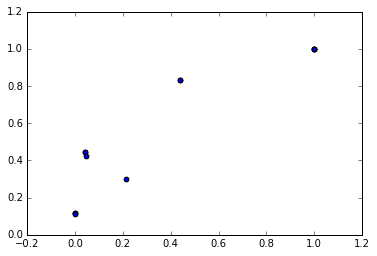

In [12]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

similarity_fp = {k: GetMorganFingerprintAsBitVect(v, radius=3) for k, v in mols.items()}
morgan = np.asarray([[FingerprintSimilarity(other, v, metric=rdkit.DataStructs.cDataStructs.TanimotoSimilarity) for other in similarity_fp.values()] 
              for v in similarity_fp.values()]).flatten()

similarity_fp = {k: GetMACCSKeysFingerprint(v) for k, v in mols.items()}
maccs = np.asarray([[FingerprintSimilarity(other, v, metric=rdkit.DataStructs.cDataStructs.TanimotoSimilarity) for other in similarity_fp.values()] 
              for v in similarity_fp.values()]).flatten()

plt.scatter(morgan, maccs,)

In [13]:
!wget ftp://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/releases/chembl_01/chembl_01.sdf.gz

--2016-03-22 14:46:45--  ftp://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/releases/chembl_01/chembl_01.sdf.gz
           => ‘chembl_01.sdf.gz.1’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.194.182
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.194.182|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/chembl/ChEMBLdb/releases/chembl_01 ... done.
==> SIZE chembl_01.sdf.gz ... 160041845
==> PASV ... done.    ==> RETR chembl_01.sdf.gz ... done.
Length: 160041845 (153M) (unauthoritative)

 8% [==>                                    ] 13 445 488  4,07MB/s  eta 34s    ^C


In [14]:
!gunzip chembl_01.sdf.gz

gzip: chembl_01.sdf already exists; do you wish to overwrite (y or n)? ^C


In [13]:
mols = Chem.SDMolSupplier("chembl_01.sdf")

In [14]:
morgan = []
maccs = []

for i, mol in enumerate(mols):
    if mol is not None:
        morgan.append(GetMorganFingerprintAsBitVect(mol, radius=3))
        maccs.append(GetMACCSKeysFingerprint(mol))
    if i > 1000:
        break

In [15]:
morgan_dists = [FingerprintSimilarity(x, y, metric=rdkit.DataStructs.cDataStructs.TanimotoSimilarity) for x in morgan for y in morgan]

In [16]:
maccs_dists = [FingerprintSimilarity(x, y, metric=rdkit.DataStructs.cDataStructs.TanimotoSimilarity) for x in maccs for y in maccs]

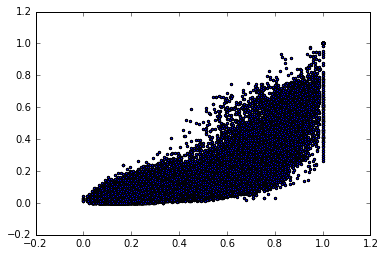

In [20]:
plt.scatter(maccs_dists, morgan_dists, marker=".")

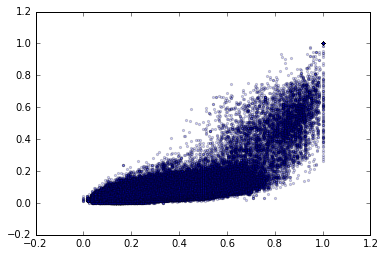

In [19]:
plt.scatter(maccs_dists, morgan_dists, marker=".", alpha=0.1)

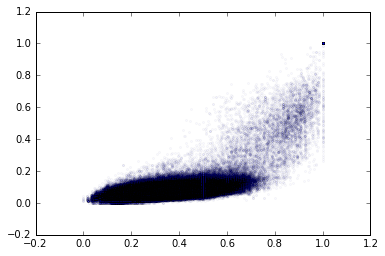

In [18]:
plt.scatter(maccs_dists, morgan_dists, marker=".", alpha=0.01)